# Session 1 - Machine Learning (ML) Algorithms Introduction Assignment

In this notebook we will follow some of the same workflows we discussed in Session 1, this time using strictly GPUs. For this work, we will use data from the Moderate Resolution Imaging Spectroradiometer (MODIS) instrument to test several data science techniques and machine learning algorithms.

**Author**: Jordan A. Caraballo-Vega, Caleb S. Spradlin  
**Release Date**: 2023.04.06  
**Last Modified**: 2023.04.06  

## Prerequisites

Before running all cells in this notebook, you will need to enable the GPU runtime from Google Colab.

First, click Runtime in in the top toolbar:

![image](https://miro.medium.com/v2/resize:fit:500/format:webp/1*eAg8XGh4S8GjNRPE-0RgbQ.png)

Then, click Change runtime type:

![image](https://miro.medium.com/v2/resize:fit:300/format:webp/1*gZHTwaB6M3Z-z6JyLyy4-g.png)

select GPU for Hardware accelerator:

![image](https://miro.medium.com/v2/resize:fit:400/format:webp/1*ZrrmH8Li3ulBnpr3y4qw3A.png)

Once the GPU Runtime has been set, run the following Python code to check GPU type:

In [1]:
!pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.6 MB/s eta 0:00:00


The goal is to have a Tesla T4, P4 or P100 GPU; if you have been allocated a K80 GPU instead, simply click the Runtime button again, then click the Reset all runtimes... option in the drop down menu (wait a few seconds for the notebook to reconnect to Google’s servers and run the above code again).

In [2]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 385 (delta 86), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (385/385), 105.74 KiB | 17.62 MiB/s, done.
Resolving deltas: 100% (188/188), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



This next cell will restart your session. Make sure to hit on the next cell manually to continue the installation process.

In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh -qq
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [993 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,629 kB]
Hit:1

Once more time, this next cell wil restart you kernel session. Make sure to hit the next cell manually to continue the installation process.

In [1]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


This next cell will install all of rapids and will take close to 15 minutes. Once this cell is done, you can continue executing all the cells that follow.

In [1]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Streaming output truncated to the last 5000 lines.











libxgboost-1.7.1dev. | 182.6 MB  | ######9    |  69% 


















libxgboost-1.7.1dev. | 182.6 MB  | ######9    |  70% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######    |  71% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######1   |  72% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######2   |  73% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######3   |  74% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######4   |  74% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######5   |  75% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######6   |  76% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######7   |  77% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######8   |  78% 


















libxgboost-1.7.1dev. | 182.6 MB  | #######9   |  79% 


















libxgboost-1.7.1dev. | 182.6 MB  | ########   |  80% 


















li

In [2]:
import cudf
import cuml
print('cuml version:', cuml.__version__, ', cudf version:', cudf.__version__)

cuml version: 22.12.00 , cudf version: 22.12.01


This means that you have successfully installed RAPIDS and can now run GPU-accelerated machine learning workflows from Google Colab.


## 1. Import Libraries

In this section we import the Python libraries to use during the development of this notebook.

In [3]:
!wget https://raw.githubusercontent.com/NASAARSET/ARSET_ML_Fundamentals/main/src/folium_helper.py

--2023-04-20 12:20:49--  https://raw.githubusercontent.com/NASAARSET/ARSET_ML_Fundamentals/main/src/folium_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6189 (6.0K) [text/plain]
Saving to: ‘folium_helper.py’

folium_helper.py    100%[===================>]   6.04K  --.-KB/s    in 0s      

2023-04-20 12:20:50 (49.3 MB/s) - ‘folium_helper.py’ saved [6189/6189]



In [4]:
!pip install datasets optuna rasterio pyproj rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━

In [5]:
import os
import sys
import csv
import time
import glob
import joblib
import datasets
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from rioxarray import merge
from pathlib import Path
from pprint import pprint

from huggingface_hub import snapshot_download

from sklearn.ensemble import RandomForestClassifier as skRF
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.inspection import permutation_importance

# import useful packages
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import natsort

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Geospatial related imports
from osgeo import gdalconst
from osgeo import gdal
import folium
from folium import plugins
import folium_helper

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

# GPU libraries
import cudf
import cuml
import cupy as cp
from cuml.cluster import KMeans as KMeansGPU

/usr/local/lib/python3.9/site-packages/pyproj/__init__.py:90: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [6]:
DATASET_URL = 'nasa-cisto-data-science-group/modis-lake-powell-toy-dataset'

## 2. Download Data

In this section we will be downloading data for this demo.

In [7]:
powell_dataset = snapshot_download(repo_id=DATASET_URL, allow_patterns="*.tif", repo_type='dataset')

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
fileList = sorted([file for file in glob.glob(os.path.join(powell_dataset, 'IL.*.Powell.*.tif')) if 'sur_refl' in file])

In [9]:
raster_arrays = []
for val in fileList:
    raster_arrays.append(rxr.open_rasterio(val))

raster = xr.concat(raster_arrays, dim="band")
raster

<xarray.DataArray (band: 7, y: 1300, x: 1300)>
array([[[1547, 1474, 1474, ..., 3151, 3151, 3087],
        [1395, 1395, 1379, ..., 3323, 3323, 3148],
        [1408, 1403, 1379, ..., 3223, 3223, 3203],
        ...,
        [2196, 2186, 2255, ..., 2193, 2253, 2230],
        [2186, 2255, 2341, ..., 2154, 2235, 2217],
        [2320, 2439, 2169, ..., 2358, 2425, 2402]],

       [[2461, 2377, 2377, ..., 4079, 4079, 4081],
        [2340, 2340, 2365, ..., 4276, 4276, 4170],
        [2343, 2387, 2365, ..., 4206, 4206, 4153],
        ...,
        [3175, 3132, 3207, ..., 2858, 2858, 2820],
        [3132, 3207, 3310, ..., 2776, 2853, 2854],
        [3284, 3392, 3113, ..., 2979, 3069, 3038]],

       [[ 857,  857,  846, ..., 1669, 1565, 1565],
        [ 857,  857,  846, ..., 1669, 1565, 1565],
        [ 812,  812,  822, ..., 1565, 1565, 1565],
        ...,
...
        ...,
        [4066, 4066, 4012, ..., 3650, 3672, 3672],
        [3981, 3981, 3951, ..., 3633, 3747, 3747],
        [3981, 3981, 3951, ..., 3633, 3747, 3747]],

       [[2730, 2730, 2613, ..., 5380, 5259, 5259],
        [2730, 2730, 2613, ..., 5380, 5259, 5259],
        [2587, 2587, 2592, ..., 5259, 5259, 5259],
        ...,
        [4343, 4343, 4330, ..., 4266, 4247, 4247],
        [4235, 4235, 4235, ..., 4223, 4345, 4345],
        [4235, 4235, 4235, ..., 4223, 4345, 4345]],

       [[2222, 2222, 2098, ..., 4809, 4576, 4576],
        [2222, 2222, 2098, ..., 4809, 4576, 4576],
        [2075, 2075, 2117, ..., 4576, 4576, 4576],
        ...,
        [3826, 3826, 3766, ..., 3862, 3863, 3863],
        [3694, 3694, 3739, ..., 3863, 3919, 3919],
        [3694, 3694, 3739, ..., 3863, 3919, 3919]]], dtype=int16)
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1
  * x            (x) float64 -1.005e+07 -1.005e+07 ... -9.753e+06 -9.753e+06
  * y            (y) float64 4.61e+06 4.61e+06 4.609e+06 ... 4.309e+06 4.309e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999
    scale_factor:   1.0
    add_offset:     0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


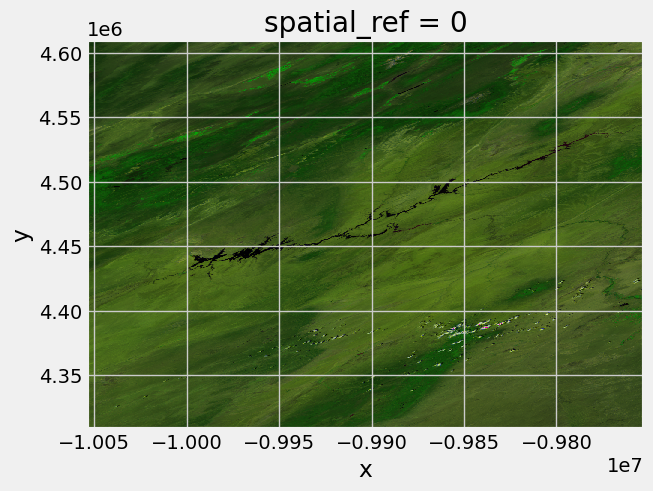

In [10]:
(raster[:3, :, :] / 10000).plot.imshow()

## 3. Move data to the GPU

Note that the data is still on the GPU, we can move the data to the GPU to start accelerating our machine learning pipeline.

In [11]:
# grab the number of bands in the image, naip images have four bands
nbands = raster.shape[0]

# create an empty array in which each column will hold a flattened band
flat_data = np.empty((raster.shape[1]*raster.shape[2], nbands))

# loop through each band in the image and add to the data array
for i in range(nbands):
    band = raster[i,:,:].values
    flat_data[:, i-1] = band.flatten()

In [13]:
flat_data, type(flat_data)

(array([[2461.,  857., 1256., ..., 2730., 2222., 1547.],
        [2377.,  857., 1256., ..., 2730., 2222., 1474.],
        [2377.,  846., 1230., ..., 2613., 2098., 1474.],
        ...,
        [2979., 1028., 1791., ..., 4223., 3863., 2358.],
        [3069., 1117., 1876., ..., 4345., 3919., 2425.],
        [3038., 1117., 1876., ..., 4345., 3919., 2402.]]),
 numpy.ndarray)

In [14]:
flat_data_gpu = cp.asarray(flat_data)
flat_data_gpu, type(flat_data_gpu)

(array([[2461.,  857., 1256., ..., 2730., 2222., 1547.],
        [2377.,  857., 1256., ..., 2730., 2222., 1474.],
        [2377.,  846., 1230., ..., 2613., 2098., 1474.],
        ...,
        [2979., 1028., 1791., ..., 4223., 3863., 2358.],
        [3069., 1117., 1876., ..., 4345., 3919., 2425.],
        [3038., 1117., 1876., ..., 4345., 3919., 2402.]]),
 cupy.ndarray)

Note that now we have a new array whose data is a cupy array and that lives directly on GPU memory for further processing.

## 4. K-Means Clustering

Lets compare the timing of CPU and GPU K-Means clustering.

In [22]:
# number of clusters
N_CLUSTERS = 100

## 4.1 K-Means Clustering on CPU

In [23]:
%%time

# set up the kmeans classification by specifying the number of clusters 
km = KMeans(n_clusters=N_CLUSTERS)

# begin iteratively computing the position of the two clusters
km.fit(flat_data)

CPU times: user 16min 50s, sys: 1min 22s, total: 18min 12s
Wall time: 13min 8s


KMeans(n_clusters=100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


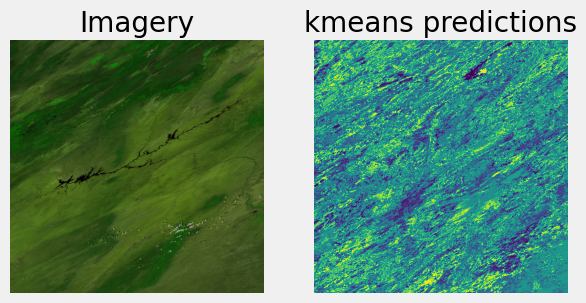

CPU times: user 1.34 s, sys: 244 ms, total: 1.58 s
Wall time: 1.08 s


In [24]:
%%time

# use the sklearn kmeans .predict method to assign all the pixels of an image to a unique cluster
flat_predictions = km.predict(flat_data)

# rehsape the flattened precition array into an MxN prediction mask
prediction_mask = flat_predictions.reshape((raster.shape[1], raster.shape[2]))

# plot the imagery and the prediction mask for comparison
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.moveaxis(raster[:3,:,:].values, 0, -1) / 10000)
axarr[0].set_title('Imagery')
axarr[1].imshow(prediction_mask)
axarr[1].set_title('kmeans predictions')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

## 4.2 K-Means Clustering on GPU

In [25]:
%%time

# set up the kmeans classification by specifying the number of clusters 
km = KMeansGPU(n_clusters=N_CLUSTERS)

# begin iteratively computing the position of the two clusters
km.fit(flat_data_gpu)

CPU times: user 12 s, sys: 66.9 ms, total: 12.1 s
Wall time: 12.1 s


KMeans()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


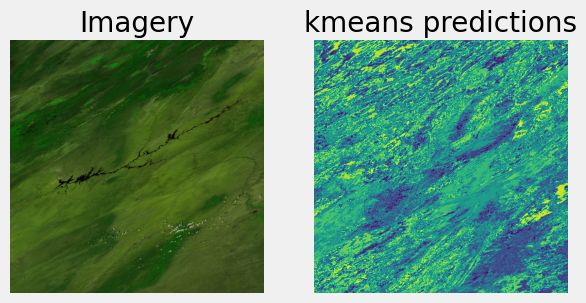

CPU times: user 782 ms, sys: 187 ms, total: 970 ms
Wall time: 1.01 s


In [26]:
%%time

# use the sklearn kmeans .predict method to assign all the pixels of an image to a unique cluster
flat_predictions = cp.asnumpy(km.predict(flat_data_gpu))

# rehsape the flattened precition array into an MxN prediction mask
prediction_mask = flat_predictions.reshape((raster.shape[1], raster.shape[2]))

# plot the imagery and the prediction mask for comparison
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.moveaxis(raster[:3,:,:].values, 0, -1) / 10000)
axarr[0].set_title('Imagery')
axarr[1].imshow(prediction_mask)
axarr[1].set_title('kmeans predictions')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

Note how CPU took more than 10 minutes while the GPU version takes close to 20 seconds to perform the clustering.

## 5. cuML implementation of some Sckit-learn algorithms

cuML is the RAPIDS GPU library that implements most of the Sckit-learn CPU-based algorithms. The implementation is very similar, some examples are listed below.

```python
from sklearn.svm import SVC 
from cuml.svm import SVC as SVC_gpu

clf_svc = SVC(kernel='poly', degree=2, gamma='auto', C=1)
sklearn_time_svc = %timeit -o train_data(clf_svc)

clf_svc = SVC_gpu(kernel='poly', degree=2, gamma='auto', C=1)
cuml_time_svc = %timeit -o train_data(clf_svc)
```

We recommend looking at the documentation of some of these workflows to accelerate the data science workflow you might have using GPUs.

[cupy](https://docs.cupy.dev/en/stable/user_guide/basic.html): GPU alternative of numpy
[cudf](https://docs.rapids.ai/api/cudf/stable/): GPU alternative of pandas
[cuml](https://docs.rapids.ai/api/cuml/stable/): GPU alternative of Sckit-learn

## 6. Some Questions to Practice Before Final Assignment

1. Which are the two common types of supervised learning?
2. Why is machine learning benefitial to Earth Science?
3. Can you compare model-driven vs data-driven approaches? Where does machine learning play a role in these?
4. What are the key differences between a Random Forest and an XGBoost model?
5. How should I start thinking about applying machine learning to my science question?